In [42]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import auc

In [43]:
%matplotlib inline
# # For pretty plots
%config InlineBackend.figure_formats = ['svg']

dataset_params = {'adult': (['Male', 'Female'], [-10, 20]),
                  'celeba': (['Male', 'Female'], [-10, 20]),
                  'civil': (['Christian', 'Non-Christian'], [-4, 4])}

In [44]:
############################
## SET DATASET NAME HERE: ##
##  Adult, CelebA, Civil  ##
############################
dataset_name = 'Adult'

In [45]:
dataset_lname = dataset_name.lower()
priviliged = dataset_params[dataset_lname][0][0]
unpriviliged = dataset_params[dataset_lname][0][1]

m_dim1 = dataset_params[dataset_lname][1][0]
m_dim2 = dataset_params[dataset_lname][1][1]

Import the generated results

In [46]:
# Open the results file for the sufficiency model of the requested dataset.
open_results = open('./Results/{}.pkl'.format(dataset_lname), 'rb')
loaded_results = pickle.load(open_results)
data = loaded_results[2]
open_results.close()

# Find and calculate all metrics.
coverage = loaded_results[1]
print(f"There are {len(coverage)} result data points for the sufficiency model.")
precision_0 = [x["d_correct_0"] / x["d_total_0"] for x in data]
precision_1 = [x["d_correct_1"] / x["d_total_1"] for x in data]
accuracy = loaded_results[0]
margins_0 = [x["margins_0"] for x in data][0]
margins_1 = [x["margins_1"] for x in data][0]

# Open the results for the baseline model of the requested dataset.
open_results_b = open('./Results/{}_base.pkl'.format(dataset_lname), 'rb')
loaded_results_b = pickle.load(open_results_b)
data_b = loaded_results_b[2]
open_results_b.close()

# Find and calculate all metrics.
coverage_base = loaded_results_b[1]
print(f"There are {len(coverage_base)} result data points for the baseline model.")
precision_base_0 = [x["d_correct_0"] / x["d_total_0"] if x["d_total_0"] != 0 else x["d_correct_0"] / 0.001 for x in data_b]
precision_base_1 = [x["d_correct_1"] / x["d_total_1"] if x["d_total_1"] != 0 else x["d_correct_1"] / 0.001 for x in data_b]
accuracy_base = loaded_results_b[0]
margins_0_b = [x["margins_0"] for x in data_b][0]
margins_1_b = [x["margins_1"] for x in data_b][0]

There are 132 result data points for the sufficiency model.
There are 121 result data points for the baseline model.


Plot the results

The accuracy-coverage curve

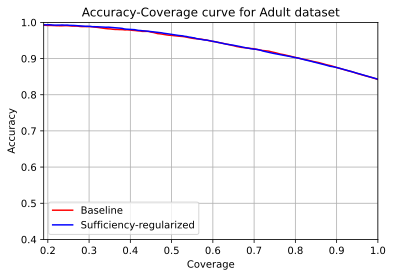

In [47]:
plt.figure()
plt.plot(coverage_base, accuracy_base, color='red', label='Baseline')
plt.plot(coverage, accuracy, color='blue', label='Sufficiency-regularized')
plt.xlabel('Coverage')
plt.ylabel('Accuracy')
plt.title('Accuracy-Coverage curve for {} dataset'.format(dataset_name))
plt.legend()
plt.xlim(0.19, 1.0)
plt.ylim(0.4, 1.0)
plt.grid()
plt.savefig('Results/Images/accuracy-coverage-{}.jpg'.format(dataset_name))
plt.show()

The group specific precision-coverage curves

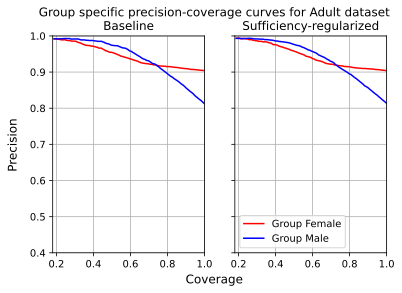

In [48]:
fig, (p1,p2) = plt.subplots(1, 2, sharey=True)
p1.plot(coverage_base, precision_base_0, color='red', label='Group {}'.format(unpriviliged))
p1.plot(coverage_base, precision_base_1, color='blue', label='Group {}'.format(priviliged))
p1.set_title('Baseline')
p1.set_xlim(0.18, 1.0)
p1.set_ylim(0.4, 1.0)
p1.grid()
p2.plot(coverage, precision_0, color='red', label='Group {}'.format(unpriviliged))
p2.plot(coverage, precision_1, color='blue', label='Group {}'.format(priviliged))
p2.set_title('Sufficiency-regularized')
p2.set_xlim(0.18, 1.0)
p2.set_ylim(0.4, 1.0)
p2.grid()

fig.supxlabel('Coverage')
fig.supylabel('Precision')
fig.suptitle('Group specific precision-coverage curves for {} dataset'.format(dataset_name))
plt.legend()
plt.savefig('Results/Images/precision-coverage-{}.jpg'.format(dataset_name))
plt.show()

The margin distributions

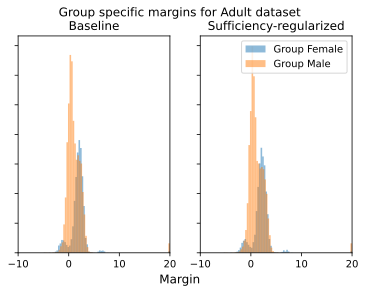

In [49]:
n_bins = 80

margins_0 = [x if x != float('inf') else m_dim2 for x in margins_0]
margins_0 = [x if x != float('-inf') else m_dim1 for x in margins_0]
margins_1 = [x if x != float('inf') else m_dim2 for x in margins_1]
margins_1 = [x if x != float('-inf') else m_dim1 for x in margins_1]

margins_0_b = [x if x != float('inf') else m_dim2 for x in margins_0_b]
margins_0_b = [x if x != float('-inf') else m_dim1 for x in margins_0_b]
margins_1_b = [x if x != float('inf') else m_dim2 for x in margins_1_b]
margins_1_b = [x if x != float('-inf') else m_dim1 for x in margins_1_b]

fig, (p1,p2) = plt.subplots(1, 2, sharey=True)
p1.hist(margins_0_b, bins=n_bins, alpha=0.5, label='Group {}'.format(unpriviliged))
p1.hist(margins_1_b, bins=n_bins, alpha=0.5, label='Group {}'.format(priviliged))
p1.set_yticklabels([])
p1.set_title('Baseline')
p1.set_xlim(m_dim1,m_dim2)
p2.hist(margins_0, bins=n_bins, alpha=0.5, label='Group {}'.format(unpriviliged))
p2.hist(margins_1, bins=n_bins, alpha=0.5, label='Group {}'.format(priviliged))
p2.set_title('Sufficiency-regularized')
p2.set_xlim(m_dim1,m_dim2)
fig.supxlabel('Margin')
fig.suptitle('Group specific margins for {} dataset'.format(dataset_name))
plt.legend()
plt.savefig('Results/Images/margin-{}.jpg'.format(dataset_name))
plt.show()

Area under curve results

In [50]:
# As our coverage stops at 0.19 the total area is less then 1.
max_area = 0.81

# The area under accuracy curve calculations.
area_under_groups_base = auc(coverage_base, accuracy_base) / max_area
area_under_groups = auc(coverage, accuracy) / max_area


# The area between precision curves calculations.
auc_group_d0 = auc(coverage, precision_0)
auc_group_d1 = auc(coverage, precision_1)

auc_base_d0 = auc(coverage_base, precision_base_0)
auc_base_d1 = auc(coverage_base, precision_base_1)

area_between_groups = abs(auc_group_d0 - auc_group_d1)
area_between_groups_base = abs(auc_base_d0 - auc_base_d1)

print("For the {} dataset, the following AUC results are calculated:".format(dataset_name))
print("\nThe area under accuracy curves:")
print("Baseline: {}".format(area_under_groups_base))
print("Sufficiency implementation: {}".format(area_under_groups))
print("\nThe area between precision curves:")
print("Baseline: {}".format(area_between_groups_base))
print("Sufficiency implementation: {}".format(area_between_groups))

For the Adult dataset, the following AUC results are calculated:

The area under accuracy curves:
Baseline: 0.9414130933439899
Sufficiency implementation: 0.9418893568444445

The area between precision curves:
Baseline: 0.00387929992012781
Sufficiency implementation: 0.005328431468298422
